[*********************100%***********************]  31 of 31 completed


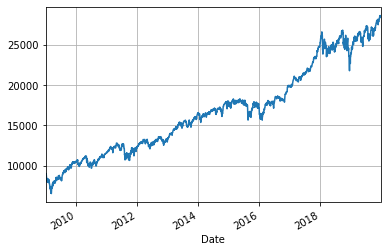

In [6]:
# Download Data from Yahoo Finance
import datetime
import matplotlib.pyplot as plt
import pandas as pd
# Pour lire les données de Yahoo Finance, vous devez installer le toolbox yfinance
import yfinance as yf 
import numpy as np
start_sp = datetime.datetime(2008,12,31)
end_sp = datetime.datetime(2019, 12,31)

# Dow Jones index
# 1st Dow Jones Index + 30 components
dow30 = ['^DJI','AXP', 'AAPL', 'BA', 'CAT', 'CSCO', 'CVX', 'DD', 'XOM',
         'GE', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'KO', 'JPM',
         'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG',
         'TRV', 'UNH', 'UTX', 'VZ', 'V', 'WMT', 'DIS']

Dow_data = yf.download(dow30, start=start_sp, end=end_sp,group_by="ticker")

# To access the adjusted close price, use
Dow_data['^DJI']['Close']

# Graph data
Dow_data['^DJI']['Close'].plot(grid=True)

Question 1

I.	Fournir une analyse descriptive de l’indice et de ses composantes

a. Calculer les rendements quotidiens en prenant le prix de base ajusté pour les dividendes 

In [9]:
Dow_data

AAPL                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2008-12-31   12.281428   12.534286   12.191428   12.192857   10.583897   
2009-01-02   12.268572   13.005714   12.165714   12.964286   11.253528   
2009-01-05   13.310000   13.740000   13.244286   13.511429   11.728474   
2009-01-06   13.707143   13.881429   13.198571   13.288571   11.535025   
2009-01-07   13.115714   13.214286   12.894286   13.001429   11.285772   
...                ...         ...         ...         ...         ...   
2019-12-24  284.690002  284.890015  282.920013  284.269989  283.596924   
2019-12-26  284.820007  289.980011  284.700012  289.910004  289.223602   
2019-12-27  291.119995  293.970001  288.119995  289.799988  289.113831   
2019-12-30  289.459991  292.690002  285.220001  291.519989  290.829773   
2019-12-31  289.929993  293.679993  289.519989  293.649994  292.954712   

                                AXP                                      ...  \
                 Volume        Open        High         Low       Close  ...   
Date                                                                     ...   
2008-12-31  151885300.0   17.969999   18.750000   17.910000   18.549999  ...   
2009-01-02  186503800.0   18.570000   19.520000   18.400000   19.330000  ...   
2009-01-05  295402100.0   19.200001   20.240000   19.000000   19.950001  ...   
2009-01-06  322327600.0   20.299999   21.379999   20.010000   21.070000  ...   
2009-01-07  188262200.0   20.530001   20.719999   19.830000   20.010000  ...   
...                 ...         ...         ...         ...         ...  ...   
2019-12-24   12119700.0  124.949997  125.330002  124.379997  124.739998  ...   
2019-12-26   23280300.0  124.980003  125.440002  124.529999  125.410004  ...   
2019-12-27   36566500.0  125.839996  125.970001  125.110001  125.190002  ...   
2019-12-30   36028600.0  125.199997  125.459999  124.180000  124.300003  ...   
2019-12-31   25201400.0  124.290001  124.570000  123.779999  124.489998  ...   

                    PG                                              HD  \
                   Low       Close   Adj Close      Volume        Open   
Date                                                                     
2008-12-31   61.070000   61.820000   43.484673  10844800.0   23.139999   
2009-01-02   61.060001   62.799999   44.174007  11135700.0   23.070000   
2009-01-05   61.590000   62.349998   43.857475  14322800.0   24.020000   
2009-01-06   61.509998   62.169998   43.730865  13401600.0   24.940001   
2009-01-07   60.639999   61.080002   42.964157  12415600.0   24.870001   
...                ...         ...         ...         ...         ...   
2019-12-24  124.580002  125.220001  124.480438   2022100.0  219.500000   
2019-12-26  124.870003  125.220001  124.480438   4760400.0  220.740005   
2019-12-27  125.389999  126.089996  125.345299   5192000.0  221.199997   
2019-12-30  124.139999  124.470001  123.734871   3884300.0  220.369995   
2019-12-31  123.949997  124.900002  124.162331   4798900.0  217.100006   

                                                                        
                  High         Low       Close   Adj Close      Volume  
Date                                                                    
2008-12-31   23.799999   22.969999   23.020000   17.488140  15143500.0  
2009-01-02   24.190001   22.959999   24.129999   18.331390  14902500.0  
2009-01-05   24.879999   23.809999   24.709999   18.772011  22570900.0  
2009-01-06   25.490000   24.620001   25.260000   19.189846  22856600.0  
2009-01-07   25.160000   24.430000   24.570000   18.665655  19857300.0  
...                ...         ...         ...         ...         ...  
2019-12-24  221.039993  219.220001  220.669998  220.669998   2260700.0  
2019-12-26  221.149994  219.589996  220.820007  220.820007   2649200.0  
2019-12-27  221.7899

In [18]:
rendementsQuotidien = np.zeros((31,len(Dow_data)))

for i in range(31):
    rendementsQuotidien[:][i] = (Dow_data[dow30[i]]['Adj Close'])

In [19]:
rendementsQuotidien = pd.DataFrame(rendementsQuotidien, index = dow30, columns = Dow_data.index)

In [21]:
rendementsQuotidien

Date,2008-12-31,2009-01-02,2009-01-05,2009-01-06,2009-01-07,2009-01-08,2009-01-09,2009-01-12,2009-01-13,2009-01-14,...,2019-12-17,2019-12-18,2019-12-19,2019-12-20,2019-12-23,2019-12-24,2019-12-26,2019-12-27,2019-12-30,2019-12-31
^DJI,8776.389648,9034.690430,8952.889648,9015.099609,8769.700195,8742.459961,8599.179688,8473.969727,8448.559570,8200.139648,...,28267.160156,28239.279297,28376.960938,28455.089844,28551.529297,28515.449219,28621.390625,28645.259766,28462.140625,28538.439453
AXP,15.380423,16.027143,16.541204,17.469830,16.733908,16.758997,16.081612,15.747105,15.880900,14.910824,...,124.518410,123.830795,124.398827,125.335579,124.059998,124.309135,124.976830,124.757584,123.870659,124.059998
AAPL,10.583897,11.253528,11.728474,11.535025,11.285772,11.495339,11.232448,10.994360,10.876552,10.581416,...,279.746094,279.077667,279.356995,278.778381,283.327576,283.596924,289.223602,289.113831,290.829773,292.954712
BA,31.760571,33.680935,34.365715,34.469925,33.316200,33.338531,33.085464,32.556984,31.604242,30.666393,...,325.065948,328.724182,331.527496,326.060028,335.553558,331.030457,327.968689,328.187408,324.469513,323.833313
CAT,31.672358,33.260574,32.672096,32.473557,30.963327,31.211479,30.630083,29.204929,29.353827,27.900320,...,145.350449,146.095215,144.009857,146.542099,147.465607,146.452713,147.187561,147.247147,146.492447,146.651321
CSCO,12.618067,13.128983,13.245105,13.771499,13.407664,13.577968,12.927711,12.695475,12.734182,12.184565,...,46.101089,46.299633,47.530586,47.103722,47.748978,47.431313,47.500801,47.421387,47.242699,47.610001
CVX,49.073780,50.765518,50.858395,51.316154,49.067131,49.252899,48.310833,46.983959,47.647392,46.234310,...,118.599998,118.550003,118.129997,119.680000,120.330002,120.339996,120.599998,120.300003,119.849998,120.510002
DD,16.967617,17.327436,16.922636,18.047073,18.080803,17.777205,17.777205,17.720980,17.484854,16.990107,...,64.220001,63.910000,63.950001,63.549999,63.919998,63.779999,63.730000,63.730000,62.290001,64.199997
XOM,55.675411,56.937794,56.930786,56.003220,54.573521,55.159340,54.099255,53.380917,54.343342,52.376606,...,68.693802,68.881119,68.407906,68.950127,69.295166,69.028984,69.137428,68.900826,68.496635,68.792389
GE,10.715392,11.290849,10.999813,11.151946,10.655862,10.675706,10.583101,10.470657,9.881970,9.332974,...,11.089946,10.950072,11.030000,11.030000,11.160000,11.190000,11.230000,11.180000,11.080000,11.160000


In [39]:
rendementsQuotidien5j = rendementsQuotidien
for i in range(len(rendementsQuotidien5j)):
    for j in range(2760):
        rendementsQuotidien5j[i][j+1] = (-rendementsQuotidien[i][j]+rendementsQuotidien[i][j+1])/rendementsQuotidien[i][j]
        print(rendementsQuotidien5j[i][j+1])

rendementsQuotidien5j

KeyError: 0

In [27]:
rendementsQuotidien5j = rendementsQuotidien
len(rendementsQuotidien5j)
len(rendementsQuotidien5j[0])

KeyError: 0